In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

import calendar

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


### Data Dictionary:

#### Hotel: Hotel (H1 = Resort Hotel or H2 = City Hotel)

#### is_canceled: Value indicating if the booking was canceled (1) or not (0)

#### lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

#### arrival_date_year: Year of arrival date

#### arrival_date_month: Month of arrival date

#### arrival_date_week_number: Week number of year for arrival date

#### arrival_date_day_of_month: Day of arrival date

#### stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

#### stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

#### adults: Number of adults

#### children: Number of children

#### babies: Number of babies

#### meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

#### country: Country of origin. Categories are represented in the ISO 3155–3:2013 format

#### market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

#### distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

#### is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)

#### previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking

#### previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking

#### reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

#### assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

#### booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

#### deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

#### agent: ID of the travel agency that made the booking

#### company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

#### days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer

#### customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

#### adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

#### required_car_parking_spaces: Number of car parking spaces required by the customer

#### total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)

#### reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

#### Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

## Data Dictionary Thoughts:
### Feature engineer column for % cancel/non-cancel
### Possible data collection recommendation: These do not appear to be associated to a particular customer/account number.  This could be useful in indentifying possible cancellation patterns.

In [4]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## What stands out from the describe?
### There is a max lead time of 737 days!  Do hotels even allow that?  Is that a good data point?
### Someone stayed 19 weekend nights.  Did this person/family stay stay for 10-11 weeks?  Looking at stays_in_week_nights, this seems plausible as a 50 weekday stretch would be 10 weeks.
### 55 adults in a single room? 10 children?  10 babies?
### \\$5,400 for an average daily rate?
### 8 Parking spots?

### Someone averaged -\\$6.38/night?

In [6]:
data = {'null_count': df.isnull().sum(), 'null_percent': df.isnull().sum()/df.shape[0]}
df_nulls = pd.DataFrame(data=data)
df_nulls.sort_values(by='null_count', ascending=False)

,null_count,null_percent
company,112593,0.943069
agent,16340,0.136862
country,488,0.004087
children,4,0.000034
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


## Company is almost all Null values.  This will most likely be dropped.

In [7]:
numeric_cols = list(df.select_dtypes(include=['float64', 'int64']))
nunique_counts = pd.DataFrame(columns=['col_name', 'nunique_count'])
for col in numeric_cols:
    nunique_counts = nunique_counts.append({'col_name': str(col), 'nunique_count': df[col].nunique()} ,ignore_index=True)
nunique_counts.sort_values(by=['nunique_count'], ascending=False)

,col_name,nunique_count
17,adr,8879
1,lead_time,479
15,company,352
14,agent,333
16,days_in_waiting_list,128
12,previous_bookings_not_canceled,73
3,arrival_date_week_number,53
6,stays_in_week_nights,35
4,arrival_date_day_of_month,31
13,booking_changes,21


## ADR looks to be a continuous variable.  Let's get an idea of the distribution.

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


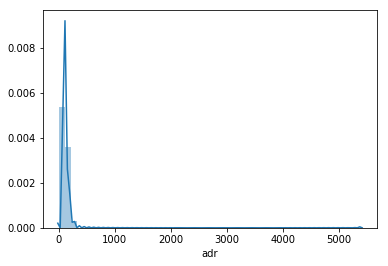

In [8]:
ax = sns.distplot(df.adr)

## A quick glance of ADR shows that most people were paying less than \\$500/night.  This column is skewed right because of some fancy villas maybe.  If these are taken out, there might be more of an even distribution.

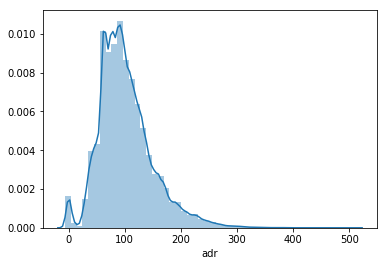

In [9]:
ax = sns.distplot(df['adr'][df.adr<1000])

## This looks a lot better.  We can still see a spike of values hovering around or below 0 and what looks to be a few possible outliers on the higher end.

In [10]:
numeric_cols = list(df.select_dtypes(include=['object']))
nunique_counts = pd.DataFrame(columns=['col_name', 'nunique_count'])
for col in numeric_cols:
    nunique_counts = nunique_counts.append({'col_name': str(col), 'nunique_count': df[col].nunique()} ,ignore_index=True)
nunique_counts.sort_values(by=['nunique_count'], ascending=False)

,col_name,nunique_count
11,reservation_status_date,926
3,country,177
1,arrival_date_month,12
7,assigned_room_type,12
6,reserved_room_type,10
4,market_segment,8
2,meal,5
5,distribution_channel,5
9,customer_type,4
8,deposit_type,3


In [11]:
# df1 = df.select_dtypes([np.int, np.float])

# for i, col in enumerate(df1.columns):
#     plt.figure(i)
#     sns.countplot(x=col, data=df1)

## There's a lot to look at here:
### I'm a little surprised at the ratio of not canceled to canceled.
### Arrival date week and arrive date year pair together.  At first glance of the week chart, I'd say there are a lot more booking in summer months.  After looking at the year distribution, I wonder if 2015 didn't start until Fall and 2017 records ended in Fall, which could drive up the values for weeks in warmer months.

In [12]:
df[['arrival_date_year', 'arrival_date_week_number','adr']].groupby(['arrival_date_year', 'arrival_date_week_number']).count().head()

adr
arrival_date_year arrival_date_week_number     
2015              27                        359
                  28                        485
                  29                        693
                  30                        770
                  31                        579

In [13]:
df[['arrival_date_year', 'arrival_date_week_number','adr']].groupby(['arrival_date_year', 'arrival_date_week_number']).count().tail()

adr
arrival_date_year arrival_date_week_number      
2017              31                        1132
                  32                        1094
                  33                        1227
                  34                        1055
                  35                         733

In [14]:
df[['arrival_date_month','arrival_date_day_of_month']][(df.arrival_date_year == 2015) & (df.arrival_date_week_number == 27)].min()

arrival_date_month           July
arrival_date_day_of_month       1
dtype: object

In [15]:
df[['arrival_date_month','arrival_date_day_of_month']][(df.arrival_date_year == 2017) & (df.arrival_date_week_number == 35)].max()

arrival_date_month           August
arrival_date_day_of_month        31
dtype: object

## Above shows that the arrival dates do range from July 1, 2015 through August 31, 2017.  This supports that there is an overlap in certain week numbers, which would lead to higher counts for those week.  Weeks 28-35 are in all 3 years (28 is a partial week in 2015 and 35 is a partial week in 2017).  The other weeks will only be in 2 years.

## The suspense is killing me.  Let's look at the big spender.  Is it Oprah or Celine Dion (Forgetting Sarah Marshall reference)?

In [16]:
df[df.adr == df.adr.max()].T

,48515
hotel,City Hotel
is_canceled,1
lead_time,35
arrival_date_year,2016
arrival_date_month,March
arrival_date_week_number,13
arrival_date_day_of_month,25
stays_in_weekend_nights,0
stays_in_week_nights,1
adults,2


## Above, we know that 'Hotel' has only 2 unique values.  This particular reservation seems odd, like maybe a data quality issue.  Let's look at the number of reservations where ADR exceeded \$1,000. 

## Something to remember is that I don't see something that indicates a cancellation is only on the customer end.  A cancellation could possibly be on the hotel end, due to an input error.  Noting the reason for cancellation could be a recommendation for data colletion, possibly a drop down menu to limit the unique values.

In [17]:
df[['adr']][df.adr >= 1000].count()

adr    1
dtype: int64

## Distribution of object type columns:

In [18]:
# df1 = df.select_dtypes([np.object])

# for i, col in enumerate(df1.columns):
#     plt.figure(i)
#     sns.countplot(x=col, data=df1)

## Notes:
## Almost a 2:1 ratio of city vs resort
## Many of these columns have a large majority of observations in only one of the possible values
## If a model to classify whether or not a customer completed their stay is created, Canceled and No-Show might work best as a combined value.

In [19]:
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

69.29
126.0
56.709999999999994


In [20]:
bottom_outlier_limit = Q1 - (1.5 * IQR)
upper_outlier_limit = Q3 + 1.5 * IQR
print(bottom_outlier_limit)
print(upper_outlier_limit)

-15.774999999999991
211.065


In [21]:
bottom_ouitliers = df['adr'][df['adr'] < bottom_outlier_limit]
upper_ouitliers = df['adr'][df['adr'] > upper_outlier_limit]
print('Bottom Outliers:')
print(bottom_ouitliers.sort_values())
print('Upper Outliers:')
print(upper_ouitliers[-5:].sort_values())

Bottom Outliers:
Series([], Name: adr, dtype: float64)
Upper Outliers:
119386    225.43
119339    229.00
119251    235.00
119289    236.33
119365    266.75
Name: adr, dtype: float64


In [22]:
upper_outlier_percent = len(upper_ouitliers)/df.shape[0] * 100
print('{upper_outlier_percent}% of oberservations are outliers on the upper end.'.format(upper_outlier_percent=round(upper_outlier_percent,5)))

3.17698% of oberservations are outliers on the upper end.


# Let's plot ADR to visualize outliers:

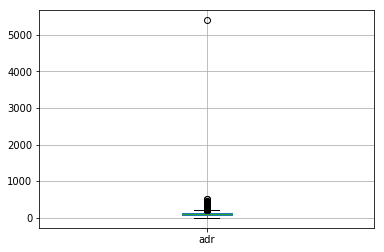

In [23]:
df[['adr']].boxplot()

# That extreme outlier, possible data quality issue, is really throwing things off.  Let's visualize without it:

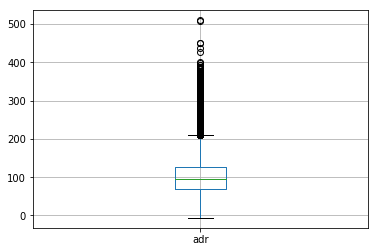

In [24]:
df[['adr']][df['adr']<5000].boxplot()

# Looking at ADR by hotel type, there appears to be a higher ADR bubble in City Hotel:

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


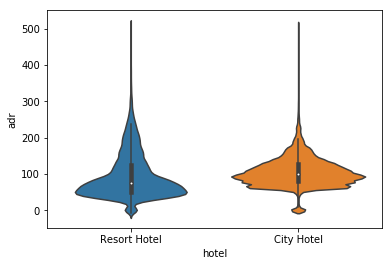

In [25]:
ax = sns.violinplot(x="hotel", y="adr", data=df[df['adr']<5000])

# Thinking back to the hypothesis that higher lead times might increase the odds of cancelling, let's take a look:

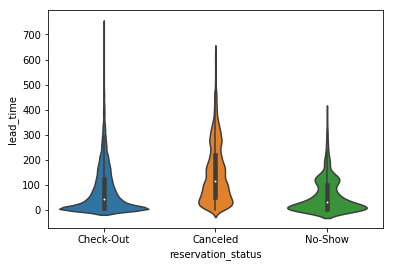

In [26]:
ax = sns.violinplot(x="reservation_status", y="lead_time", data=df[df['adr']<5000])

# It sure does look like it now.

# Things to consider later:
## The ADR's around or below 0
## What distributions might look like if data is split by hotel
## Long lead times may mean higher probablity of a canceled reservation
## Same thing for no deposit customers

In [27]:
df_low_adr = df[df['adr'] <= 10]
df_low_adr.shape

(2228, 32)

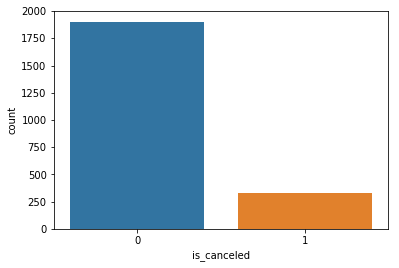

In [28]:
sns.countplot(x=df_low_adr.is_canceled, data=df_low_adr)

In [29]:
df['adr_bin'] = pd.cut(df['adr'], [df.adr.min()-1, 0, 25, 100, 200, df.adr.max()], labels=['<0', '0-25', '25-100', '100-200', '>200'])

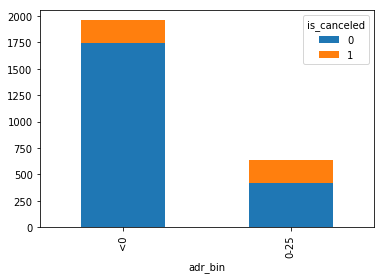

In [30]:
pd.crosstab(df['adr_bin'][df['adr'] <= 25], df['is_canceled'][df['adr'] <= 25]).plot(kind='bar', stacked=True)

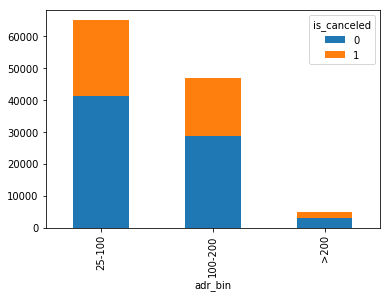

In [31]:
pd.crosstab(df['adr_bin'][df['adr'] > 25], df['is_canceled'][df['adr'] > 25]).plot(kind='bar', stacked=True)

In [32]:
df_adr_bin_perc = pd.DataFrame(1/df[['adr_bin','is_canceled']].groupby('adr_bin').count()).reset_index()

In [49]:
stacked_data = df[['adr_bin','is_canceled']].merge(pd.DataFrame(1/df[['adr_bin','is_canceled']].groupby('adr_bin').count()).reset_index(), left_on='adr_bin', right_on='adr_bin')
# stacked_data = stacked_data[['adr_bin', 'is_canceled_y']]
# ax = stacked_data.plot.bar(x='adr_bin', y='is_canceled_y')
stacked_data.head()

,adr_bin,is_canceled_x,is_canceled_y
0,<0,0,0.00051
1,<0,0,0.00051
2,<0,0,0.00051
3,<0,0,0.00051
4,<0,0,0.00051


In [42]:
stacked_data = stacked_data.groupby(['adr_bin','is_canceled_x']).sum().reset_index()
stacked_data

,adr_bin,is_canceled_x,is_canceled_y
0,<0,0,0.891327
1,<0,1,0.108673
2,0-25,0,0.655118
3,0-25,1,0.344882
4,25-100,0,0.634380
5,25-100,1,0.365620
6,100-200,0,0.613032
7,100-200,1,0.386968
8,>200,0,0.616149
9,>200,1,0.383851


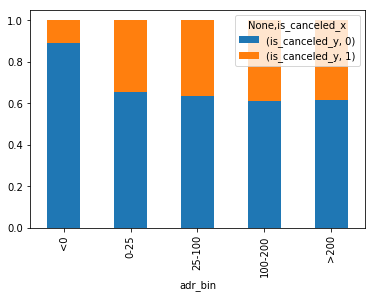

In [50]:
stacked_data.groupby(['adr_bin','is_canceled_x']).sum().unstack().plot(kind='bar',stacked=True)

In [ ]:
pd.pivot_table(df, values='is_canceled', index='adr_bin', aggfunc=np.sum)

# The very low ADR's seldom cancel.  Could these be reward points users?

In [51]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_bin
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,<0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,<0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,25-100


In [53]:
df.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [54]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['month'] = df.arrival_date_month.map(d)
df.head(3)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_bin,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,<0,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,<0,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,25-100,7


In [58]:
df.rename(columns={'arrival_date_year': 'year', 'arrival_date_day_of_month': 'day'}, inplace=True)
df['arrival_date'] = pd.to_datetime(df[['year', 'month' , 'day']])
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
year                                       int64
arrival_date_month                        object
arrival_date_week_number                   int64
day                                        int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [59]:
df = df.set_index('arrival_date')
df.head(3)

,hotel,is_canceled,lead_time,year,arrival_date_month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_bin,month
arrival_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,<0,7
2015-07-01,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,<0,7
2015-07-01,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,25-100,7


In [62]:
# Checking for missing dates in index
pd.date_range(start= df.index[0], end= df.index[-1]).difference(df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [64]:
df['adr'].resample('W').count()

arrival_date
2015-07-05     412
2015-07-12     495
2015-07-19     684
2015-07-26     763
2015-08-02     582
2015-08-09     887
2015-08-16    1181
2015-08-23     751
2015-08-30     795
2015-09-06    1082
2015-09-13    1045
2015-09-20    1435
2015-09-27    1244
2015-10-04    1144
2015-10-11    1318
2015-10-18    1236
2015-10-25     964
2015-11-01     775
2015-11-08     542
2015-11-15     395
2015-11-22     694
2015-11-29     596
2015-12-06     888
2015-12-13     563
2015-12-20     334
2015-12-27     575
2016-01-03     905
2016-01-10     381
2016-01-17     440
2016-01-24     572
              ... 
2017-02-12     922
2017-02-19    1094
2017-02-26    1273
2017-03-05    1120
2017-03-12    1053
2017-03-19    1198
2017-03-26    1017
2017-04-02    1045
2017-04-09    1438
2017-04-16    1313
2017-04-23    1231
2017-04-30    1451
2017-05-07    1471
2017-05-14    1302
2017-05-21    1513
2017-05-28    1473
2017-06-04    1405
2017-06-11    1374
2017-06-18    1229
2017-06-25    1226
2017-07-02    1297

In [87]:
df = df[df.adr < 1000]

In [94]:
df_day = df['adr'].resample('D').sum().reset_index()
df_day.set_index('arrival_date', inplace=True)
df_day.head()

,adr
arrival_date,
2015-07-01,11325.13
2015-07-02,7645.11
2015-07-03,5442.25
2015-07-04,7531.24
2015-07-05,5300.14


In [95]:
data_columns = ['adr']
data_weekly_mean = df_day[data_columns].resample('W').mean() # W stands for weekly
data_weekly_mean.head(10)

,adr
arrival_date,
2015-07-05,7448.774000
2015-07-12,6658.202857
2015-07-19,9916.720000
2015-07-26,10583.037143
2015-08-02,9524.380000
2015-08-09,12472.648571
2015-08-16,18235.928571
2015-08-23,12204.217143
2015-08-30,11253.877143


In [96]:
data_7d_rol = df_day[data_columns].rolling(window = 7, center = True).mean()
data_7d_rol.head(10)

,adr
arrival_date,
2015-07-01,NaN
2015-07-02,NaN
2015-07-03,NaN
2015-07-04,7003.941429
2015-07-05,6174.554286
2015-07-06,6004.087143
2015-07-07,6042.604286
2015-07-08,6421.587143
2015-07-09,6658.202857


In [97]:
data_365d_rol = df_day[data_columns].rolling(window = 365, center = True).mean()

In [98]:
import matplotlib.dates as mdates

Text(0.5, 1.0, 'Trends in ADR')

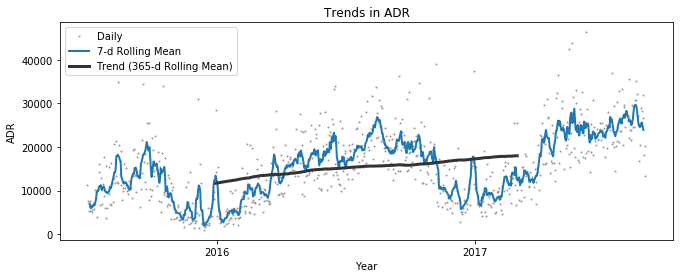

In [102]:
fig, ax = plt.subplots(figsize = (11,4))
# plotting daily data
ax.plot(df_day['adr'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(data_7d_rol['adr'], linewidth=2, label='7-d Rolling Mean')
# plotting annual rolling data
ax.plot(data_365d_rol['adr'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')
# Beautification of plot
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('ADR')
ax.set_title('Trends in ADR')

In [130]:
df_day = df['is_canceled'].resample('D').sum().reset_index()
df_day.set_index('arrival_date', inplace=True)
df_day.head()

,is_canceled
arrival_date,
2015-07-01,19
2015-07-02,57
2015-07-03,19
2015-07-04,43
2015-07-05,16


In [124]:
data_columns = ['is_canceled']
data_7d_rol = df_day[data_columns].rolling(window = 7, center = True).mean()
data_7d_rol.head(10)

,is_canceled
arrival_date,
2015-07-01,NaN
2015-07-02,NaN
2015-07-03,NaN
2015-07-04,30.428571
2015-07-05,31.142857
2015-07-06,30.285714
2015-07-07,28.857143
2015-07-08,28.714286
2015-07-09,30.142857


In [125]:
data_365d_rol = df_day[data_columns].rolling(window = 365, center = True).mean().reset_index()
data_365d_rol.set_index('arrival_date', inplace=True)

Text(0.5, 1.0, 'Trends in Check-Ins')

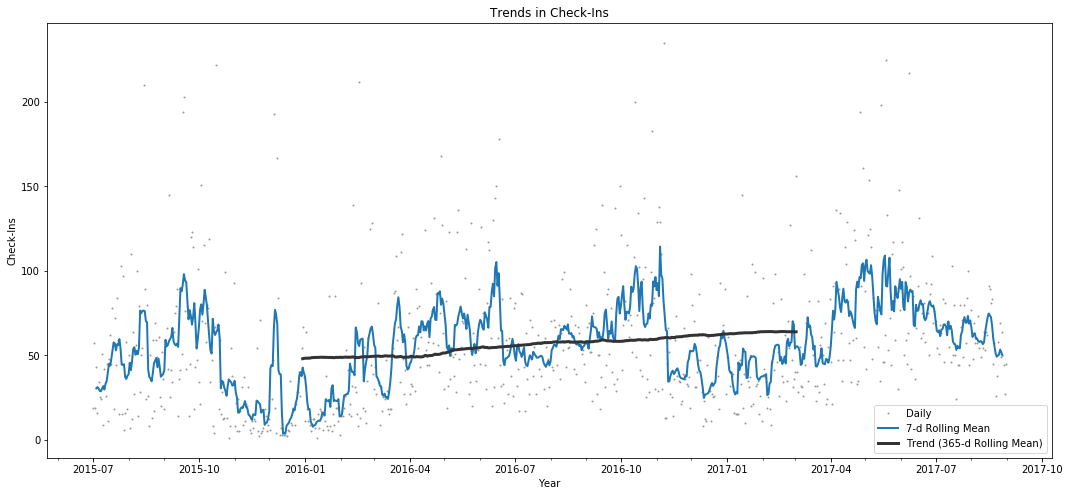

In [135]:
fig, ax = plt.subplots(figsize = (18,8))
# plotting daily data
ax.plot(df_day['is_canceled'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(data_7d_rol['is_canceled'], linewidth=2, label='7-d Rolling Mean')
# plotting annual rolling data
ax.plot(data_365d_rol['is_canceled'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')
# Beautification of plot
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Check-Ins')
ax.set_title('Trends in Check-Ins')

## Experiment 2: Trying to find a way to check if a value is in a sort of hierarchy.  Example below: All values for apple are related to fruit, but fruit has other values that show up under it.  Working on finding a way to find that level up for any value.

In [ ]:
d = {'groupname': ['fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'planet', 'planet', 'planet', 'planet', 'planet', 'planet', 'color', 'color', 'color', 'color', 'color', 'color'], \
     'examplename': ['apple', 'orange', 'banana', 'apple', 'orange', 'banana', 'mars', 'venus', 'pluto - i still count it', 'mars','venus', 'pluto - i still count it', 'orange', 'blue', 'red', 'orange', 'blue', 'red']}
d = pd.DataFrame(data=d)
d

# Updated:

In [ ]:
corr_df = d.select_dtypes(include=['object'])

In [ ]:
for col in corr_df:
    dummy_df = pd.get_dummies(corr_df[col], prefix=col, prefix_sep='_')
    corr_df = pd.concat([corr_df, dummy_df], axis=1)
corr_df.head()

In [ ]:
col_matches = pd.DataFrame(columns=['parent_col','child_col'])
for col in corr_df.select_dtypes(include=['uint8']).columns:
    print('col:'+col)
    corr_df2 = corr_df[corr_df[col] != 0].select_dtypes(include=['uint8'])
    print(corr_df2)
    corr_cols = list(corr_df2.columns)
    corr_df2.reset_index(drop=True, inplace=True)
    for col2 in corr_cols:
        print('checking:'+col2)
        if corr_df2[col].equals(corr_df2[col2]):
            print('**MATCH: '+col2,col)
            match_list = {'parent_col': [col2], 'child_col': [col]}
            matches = pd.DataFrame(data=match_list)
            col_matches = col_matches.append(matches)

In [ ]:
col_matches = col_matches[col_matches['parent_col'] != col_matches['child_col']].sort_values(by=['parent_col','child_col'])

In [ ]:
col_matches

## Added orange to be included in both 'fruit' and 'color' to check results.  Below is a list 'parent' values to the 'child' value that is found under it.  Orange does not show up because it has both 'fruit' and 'color' above it.  

## Next step is to create the hierarchy (First create a third level).  Thought: a value in parent that is not in child is the highest level.  Find those values, then find their child values, and so on.

# Next steps:
## Remove columns with all Nulls
## If col1 == col2: Pass in function to speed up process; Also, if col.nunique() == sum(col)
## Possibly add in, if sum >= 10, and sum of col 2 is 90% of col 1, then put in a separate dataframe to create a df of close matches.  If 3<col1<10, then sum of col2 - 1, possibly.